# Project 3: Handwritten Digit Recognition (MNIST)

**Objective:** Build a Neural Network to recognize handwritten digits (0-9) from the famous **MNIST dataset**.

**Dataset:** The dataset consists of 60,000 training images and 10,000 test images. Each image is a 28x28 grayscale grid representing a digit.

**Workflow:**
1.  **Data Preprocessing:** Loading and normalizing pixel values.
2.  **Model Architecture:** Building a Dense Neural Network with Dropout for regularization.
3.  **Training & Evaluation:** analyzing accuracy and loss curves.
4.  **Real-Time Testing:** An interactive drawing canvas to test the model on your own handwriting.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from google.colab import files
from PIL import Image
from keras.utils import to_categorical

### Data Visualization: Sample Digits

Before building the model, it is crucial to inspect the data. Below, we visualize one example for each digit class (0-9) to understand the input format (grayscale images, 28x28 pixels).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


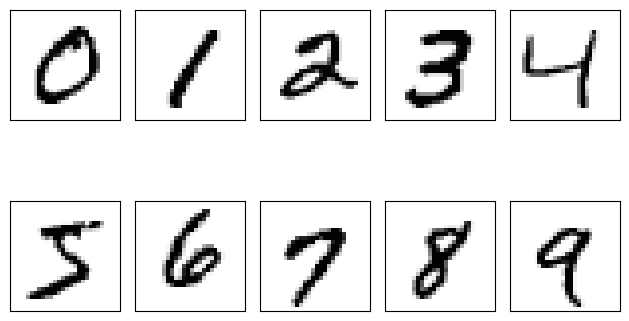

In [2]:
# Load the MNIST dataset
# The dataset contains 60,000 training images and 10,000 testing images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Create a figure to visualize one example of each digit (0-9)
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
 img = train_images[ train_labels==i ][0].reshape(28,28)
 ax[i].imshow( img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Visualizing Variance in Handwriting (Digit '7')

Handwriting styles vary significantly between individuals. Below, we visualize **10 different samples** of the digit **7** from the training dataset to observe these variations.

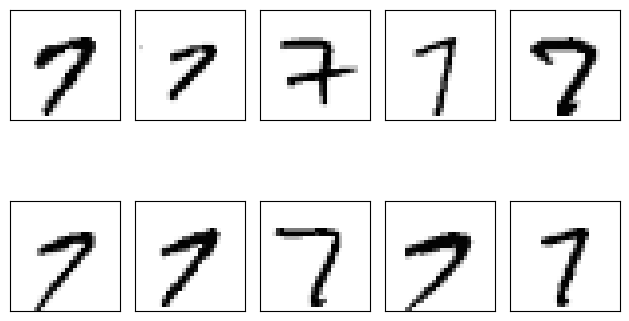

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
 img = train_images[ train_labels==7 ][i].reshape(28,28)
 ax[i].imshow( img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Data Preprocessing

Before feeding the data into the Neural Network, we need to transform it:
1.  **Reshaping (Flattening):** Convert 2D images (28x28) into 1D vectors (784 features).
2.  **Normalization:** Scale pixel values from the range [0, 255] to [0, 1] for better convergence.
3.  **One-Hot Encoding:** Convert integer labels (0-9) into categorical vectors (e.g., `5` -> `[0,0,0,0,0,1,0,0,0,0]`).

In [4]:
# 1. Reshape images: (N, 28, 28) -> (N, 784)
# We flatten the image into a single feature vector
x_train = train_images.reshape((60000, 28*28))
x_test = test_images.reshape((10000, 28*28))

# 2. Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 3. One-Hot Encode labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#Verification
print( train_labels[0] )
print( y_train[0] )


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Model Architecture & Training

We construct a **Multi-Layer Perceptron (MLP)** neural network.
* **Input Layer:** 784 neurons (flattened image).
* **Hidden Layers:** Two dense layers (512 and 256 neurons) with **ReLU** activation to capture non-linear patterns.
* **Regularization:** **Dropout (0.2)** is applied after each hidden layer to prevent overfitting by randomly deactivating 20% of neurons during training.
* **Output Layer:** 10 neurons with **Softmax** activation to output probabilities for digits 0-9.

We train the model using the **Adam** optimizer and employ **Early Stopping** to halt training if validation loss stops improving.

Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8552 - loss: 0.4987 - val_accuracy: 0.9637 - val_loss: 0.1183
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9618 - loss: 0.1271 - val_accuracy: 0.9736 - val_loss: 0.0821
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9759 - loss: 0.0785 - val_accuracy: 0.9787 - val_loss: 0.0703
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9805 - loss: 0.0613 - val_accuracy: 0.9778 - val_loss: 0.0698
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9852 - loss: 0.0477 - val_accuracy: 0.9805 - val_loss: 0.0595
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9872 - loss: 0.0397 - val_accuracy: 0.9789 - val_loss: 0.0653
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9905 - loss: 0.0296 - val_accuracy: 0.9818 - val_loss: 0.0538
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.

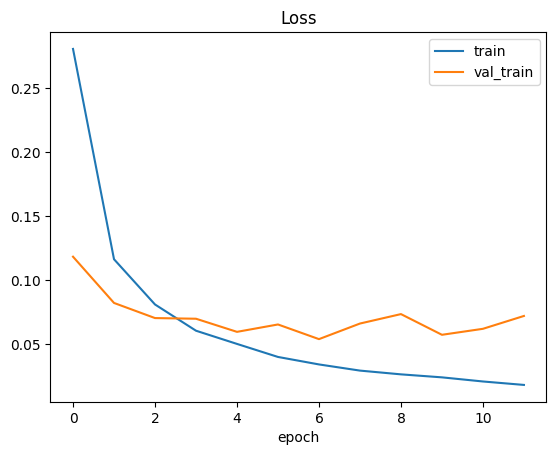

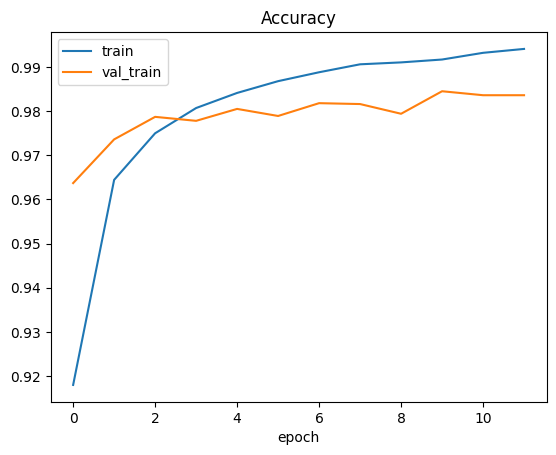

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Loss: 0.05383336916565895, test accuracy: 0.982


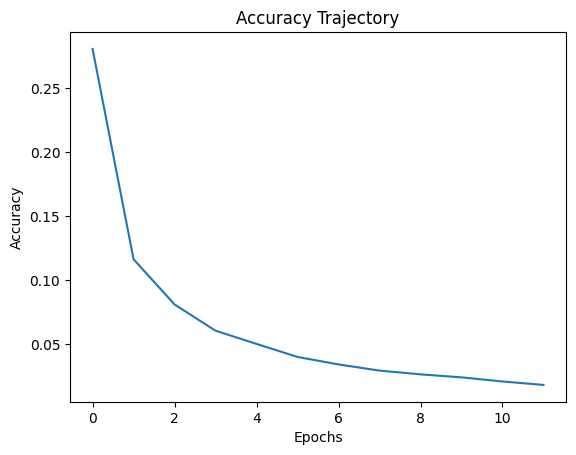

In [12]:
# 1. Model Definition
model = keras.Sequential([
layers.Input(shape=(28*28,)),
layers.Dense(512, activation='relu'),
layers.Dropout(0.2),
layers.Dense(256, activation='relu'),
layers.Dropout(0.2),
layers.Dense(10, activation='softmax')
]
)

# 2. Compilation & Training
model.compile(optimizer=Adam(learning_rate=0.0005),
loss='categorical_crossentropy',
metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model
history = model.fit(x_train, y_train, epochs=25, batch_size=64, callbacks=[early_stopping],
verbose=1, validation_data=(x_test, y_test))

# Visualization
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val_train')
plt.title('Accuracy'); plt.xlabel('epoch'); plt.legend(); plt.show()
predict_x = model.predict(x_train)
y_result = np.argmax(predict_x,axis=1)

# Accuracy plot
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.title('Accuracy Trajectory')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['loss'], label='train')

### Error Analysis: Where did the model fail?

Even with high accuracy, the model makes mistakes. Visualizing these errors helps us understand if the model struggles with specific writing styles or ambiguous digits.

Below, we display **10 examples of misclassified digits**, showing the **Predicted** label vs. the **True** label.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


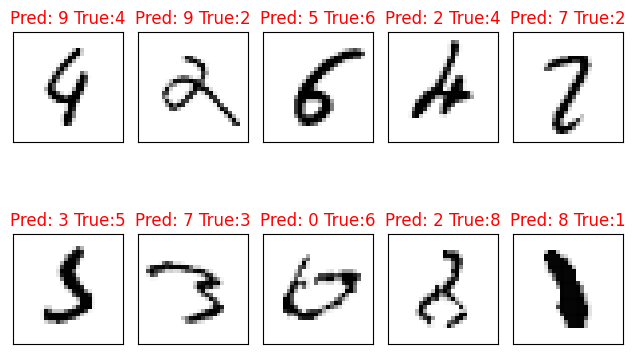

In [15]:
# 1. Get predictions for the test set
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)
y_true = np.argmax(y_test, axis=1)

# 2. Identify indices where predictions were wrong
errors_mask = (y_pred != y_true)
error_indices = np.where(errors_mask)[0]

# 3. Visualize the first 10 errors
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(10):
    error_idx = error_indices[i]
    img = x_test[error_idx].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    # Title in Red: shows Prediction vs Truth
    ax[i].set_title(f"Pred: {y_pred[error_idx]} True:{y_true[error_idx]}", color='red')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Testing with External Images 📤

Finally, we test the model on completely new data. You can upload an image file (e.g., created in MS Paint or Photoshop) to see if the model can recognize it.

**Note:** The preprocessing step includes **color inversion** (`255 - img`), because standard images usually have black digits on a white background, whereas the MNIST dataset contains white digits on a black background.

Saving 3.png to 3 (4).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


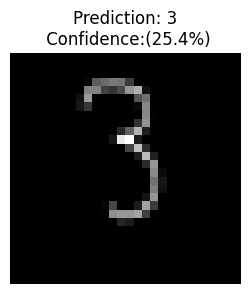

In [25]:
# Test with External Image (Upload)

uploaded = files.upload()
for fn in uploaded.keys():
    # Load image and convert to grayscale
    img_original = Image.open(fn).convert('L')

    # Resize to 28x28 pixels (Standard MNIST size)
    img_resized = img_original.resize((28, 28))

    img_array = np.array(img_resized)

    # Invert colors. This is needed if you upload a black digit on white paper
    img_array = 255 - img_array

    #Normalize
    img_ready = img_array.astype('float32') / 255.0

    img_vector = img_ready.reshape(1, 28 * 28)

    # Prediction
    prediction = model.predict(img_vector)
    result = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Visualization
    plt.figure(figsize=(3,3))
    plt.imshow(img_ready, cmap='gray')
    plt.title(f"Prediction: {result}\n Confidence:({confidence:.1f}%)")
    plt.axis('off')
    plt.show()